# Иллюстрация Центральной Предельной Теоремы

### Проиллюстрируем действие центральной предельной теоремы на примере распределения $\chi^2$

импортируем необходимые библиотеки

In [40]:
from scipy.stats import chi2, norm
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt

Выберем распределение $\chi^2$ с двумя степенями свободы  
создадим выборку из 1000 реализаций, также создадим вспомогательный массив для построения графика плотности

In [86]:
df=2
r = chi2.rvs(df, size=1000)
X = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.98, df), 100)

Построим на одном графике нормированную гистограмму на основе нашей выборки и график плотности распределения

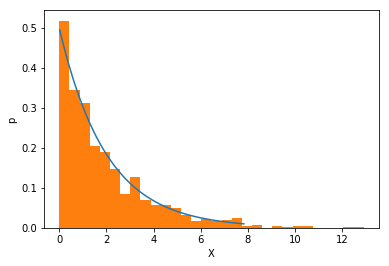

In [87]:
plt.plot(X, chi2.pdf(X, df))
plt.hist(r, density=True, bins = 30)
plt.xlabel('X')
plt.ylabel('p')
plt.show()

Видим что распределение сильно скошено и явно отличается от нормального  
теперь посмотрим на распределение среднего по 1000 выборок размером 5.  
плотность теоретического нормальное распределение, аппроксимируещего распределение среднего, будет иметь следующий вид:
$$N(2, {4/n})$$
где n - размер выборок, так как для распределения $\chi^2$ мат. ожидание равно 2 и дисперсия равна 4  
`norm` из scipy принимает как параметр не дисперсию, а среднеквадратичное отклонение

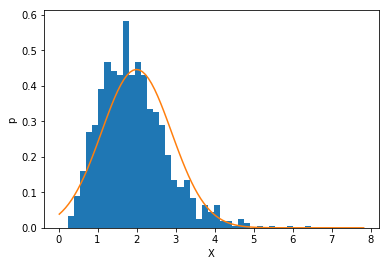

In [83]:
n=5
r2 = chi2.rvs(df, size=[1000, n])
plt.hist(np.mean(r2, axis=1), density=True, bins = 40)
plt.plot(X, (norm.pdf(X, 2, 2/np.sqrt(n))))
plt.xlabel('X')
plt.ylabel('p')
plt.show()

видим что выборочное распределение ближе к нормальному и менее скошено, хотя все еще заметно отличается  
построим те же графики для $n=10$

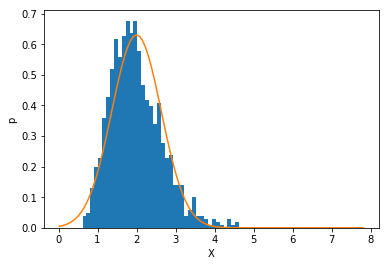

In [84]:
n=10
r2 = chi2.rvs(df, size=[1000, n])
plt.hist(np.mean(r2, axis=1), density=True, bins = 40)
plt.plot(X, (norm.pdf(X, 2, 2/np.sqrt(n))))
plt.xlabel('X')
plt.ylabel('p')
plt.show()

выборочное распределение еще ближе к нормальному, но отличия ещё заметны  
теперь для $n=50$

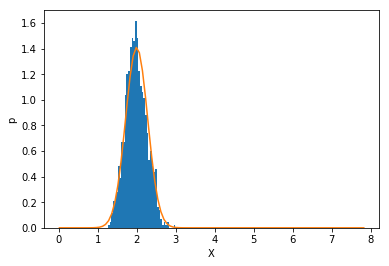

In [85]:
n=50
r2 = chi2.rvs(df, size=[1000, n])
plt.hist(np.mean(r2, axis=1), density=True, bins = 40)
plt.plot(X, (norm.pdf(X, 2, 2/np.sqrt(n))))
plt.xlabel('X')
plt.ylabel('p')
plt.show()

видим, что выборочное распределение почти совпадает с нормальным

Таким образом мы показали, что при росте объема выборок, распределение выборочного среднего все лучше апроксимируется соответствующим нормальным распределением, что согласуется с Центральной Предельной Теоремой